# Ejemplo de Red Neuronal Recurrente(RNN) - series temporales

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
leche = pd.read_csv('produccion-leche.csv', index_col='Month')

In [3]:
leche.head()

,Milk Production
Month,
1962-01-01 01:00:00,589.0
1962-02-01 01:00:00,561.0
1962-03-01 01:00:00,640.0
1962-04-01 01:00:00,656.0
1962-05-01 01:00:00,727.0


In [4]:
leche.info()

<class 'pandas.core.frame.DataFrame'>
Index: 168 entries, 1962-01-01 01:00:00 to 1975-12-01 01:00:00
Data columns (total 1 columns):
Milk Production    168 non-null float64
dtypes: float64(1)
memory usage: 2.6+ KB


In [5]:
leche.index = pd.to_datetime(leche.index)

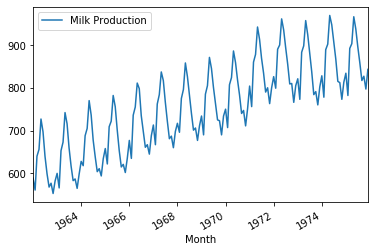

In [6]:
leche.plot()

In [7]:
conjunto_entrenamiento = leche.head(150)
conjunto_pruebas = leche.tail(18)

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
normalizacion = MinMaxScaler()
entrenamiento_normalizado = normalizacion.fit_transform(conjunto_entrenamiento)
pruebas_normalizado = normalizacion.fit_transform(conjunto_pruebas)

In [10]:
def lotes(datos_entrenamiento, tamano_lote, pasos):
    comienzo = np.random.randint(0, len(datos_entrenamiento) - pasos)
    lote_y = np.array(datos_entrenamiento[comienzo:comienzo+pasos+1].reshape(1,pasos+1))
    return lote_y[:,:-1].reshape(-1,pasos,1), lote_y[:,1:].reshape(-1,pasos,1)

In [11]:
numero_entradas = 1
numero_pasos = 18
numero_neuronas = 120
numero_salidas = 1
tasa_aprendizaje = 0.001
numero_iteraciones_entrenamiento = 5000
tamano_lote = 1

In [12]:
X = tf.placeholder(tf.float32, [None, numero_pasos, numero_entradas])
y = tf.placeholder(tf.float32, [None, numero_pasos, numero_salidas])

In [13]:
capa = tf.contrib.rnn.OutputProjectionWrapper(tf.contrib.rnn.BasicLSTMCell(num_units=numero_neuronas, activation=tf.nn.relu), output_size = numero_salidas)

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.


In [14]:
salidas, estados = tf.nn.dynamic_rnn(capa, X, dtype=tf.float32)

Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [15]:
funcion_error = tf.reduce_mean(tf.square(salidas-y))
optimizador = tf.train.AdamOptimizer(learning_rate=tasa_aprendizaje)
entrenamiento = optimizador.minimize(funcion_error)

In [16]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [17]:
with tf.Session() as sesion:
    sesion.run(init)
    for iteracion in range(numero_iteraciones_entrenamiento):
        lote_X, lote_y = lotes(entrenamiento_normalizado, tamano_lote, numero_pasos)
        sesion.run(entrenamiento, feed_dict={X:lote_X, y:lote_y})
        if iteracion %100 == 0:
            error = funcion_error.eval(feed_dict={X:lote_X, y:lote_y})
            print(iteracion, "\t Error", error)
            
        saver.save(sesion, "./modelo_series_temporales")

0 	 Error 0.1655122
100 	 Error 0.021463891
200 	 Error 0.02835444
300 	 Error 0.014356215
400 	 Error 0.012724071
500 	 Error 0.011166618
600 	 Error 0.014424013
700 	 Error 0.00731455
800 	 Error 0.009332979
900 	 Error 0.0063514924
1000 	 Error 0.0073059145
1100 	 Error 0.005072886
1200 	 Error 0.008570372
1300 	 Error 0.0048662927
1400 	 Error 0.005206218
1500 	 Error 0.0076279193
1600 	 Error 0.005655088
1700 	 Error 0.0077825626
1800 	 Error 0.0042406227
1900 	 Error 0.0023867693
2000 	 Error 0.0029442073
2100 	 Error 0.0034409538
2200 	 Error 0.0046362374
2300 	 Error 0.003916713
2400 	 Error 0.003409171
2500 	 Error 0.003694502
2600 	 Error 0.003668982
2700 	 Error 0.0026967386
2800 	 Error 0.007434564
2900 	 Error 0.0024586122
3000 	 Error 0.003896322
3100 	 Error 0.0015026854
3200 	 Error 0.0030777927
3300 	 Error 0.0025795358
3400 	 Error 0.0024812135
3500 	 Error 0.0038644345
3600 	 Error 0.0030046194
3700 	 Error 0.003724574
3800 	 Error 0.0025868316
3900 	 Error 0.0038145

In [18]:
conjunto_pruebas

,Milk Production
Month,
1974-07-01 01:00:00,908.0
1974-08-01 01:00:00,867.0
1974-09-01 01:00:00,815.0
1974-10-01 01:00:00,812.0
1974-11-01 01:00:00,773.0
1974-12-01 01:00:00,813.0
1975-01-01 01:00:00,834.0
1975-02-01 01:00:00,782.0
1975-03-01 01:00:00,892.0


In [19]:
with tf.Session() as sesion:
    saver.restore(sesion, "./modelo_series_temporales")
    entrenamiento_seed = list(entrenamiento_normalizado[-18:])
    for iteracion in range(18):
        lote_X = np.array(entrenamiento_seed[-numero_pasos:]).reshape(1,numero_pasos,1)
        prediccion_y = sesion.run(salidas, feed_dict={X:lote_X})
        entrenamiento_seed.append(prediccion_y[0,-1,0])

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from ./modelo_series_temporales


In [20]:
resultados = normalizacion.inverse_transform(np.array(entrenamiento_seed[18:]).reshape(18,1))

In [21]:
resultados

array([[ 940.74396],
       [ 929.4869 ],
       [ 914.74097],
       [ 911.80817],
       [ 906.469  ],
       [ 909.31366],
       [ 923.86865],
       [ 918.64343],
       [ 958.4561 ],
       [ 973.09106],
       [1004.8064 ],
       [ 994.2457 ],
       [ 975.0672 ],
       [ 959.92615],
       [ 942.08105],
       [ 936.0074 ],
       [ 926.24976],
       [ 931.0786 ]], dtype=float32)

In [22]:
conjunto_pruebas

,Milk Production
Month,
1974-07-01 01:00:00,908.0
1974-08-01 01:00:00,867.0
1974-09-01 01:00:00,815.0
1974-10-01 01:00:00,812.0
1974-11-01 01:00:00,773.0
1974-12-01 01:00:00,813.0
1975-01-01 01:00:00,834.0
1975-02-01 01:00:00,782.0
1975-03-01 01:00:00,892.0


In [23]:
conjunto_pruebas['Predicciones'] = resultados

C:\Users\Cata\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [24]:
conjunto_pruebas

,Milk Production,Predicciones
Month,,
1974-07-01 01:00:00,908.0,940.743958
1974-08-01 01:00:00,867.0,929.486877
1974-09-01 01:00:00,815.0,914.740967
1974-10-01 01:00:00,812.0,911.808167
1974-11-01 01:00:00,773.0,906.468994
1974-12-01 01:00:00,813.0,909.313660
1975-01-01 01:00:00,834.0,923.868652
1975-02-01 01:00:00,782.0,918.643433
1975-03-01 01:00:00,892.0,958.456116


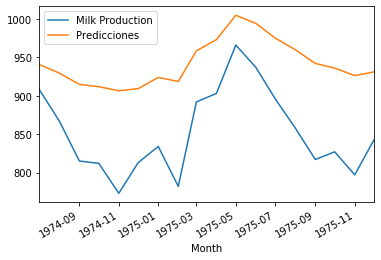

In [25]:
conjunto_pruebas.plot()